In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv("ge16-candidates-elected-merged-clean.csv")

## 1. [10pt] Getting Data: Download the data for Homework3 from Moodle.

### [5pt] Print the number of rows and columns in the dataset.

In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 386
Number of columns: 15


### [5pt] Print the first 10 rows and the last 10 rows.

In [4]:
df.head(10)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
0,3072008153,Aylward,Bobby,Bobby Aylward,Male,ff,Carlow-Kilkenny,1,3,565,248,2 days ago,98,bobby_aylward,189
1,235965948,Deering,Pat,Pat Deering,Male,fg,Carlow-Kilkenny,1,0,384,22,24 hours ago,4,patdeeringfg,1
2,22495835,FitzGerald,David,David FitzGerald,Male,fg,Carlow-Kilkenny,0,0,1078,1199,5 days ago,49,davidfitzg,492
3,3004038711,Funchion,Kathleen,Kathleen Funchion,Female,sf,Carlow-Kilkenny,1,3,1149,263,1 day ago,261,kathleensf1,383
4,1965320396,Hourihane,Elizabeth,Elizabeth Hourihane,Female,ind,Carlow-Kilkenny,0,0,114,74,2 days ago,19,elizabethhourih,154
5,25266811,Mac Liam,Conor,Conor Mac Liam,Male,aaa-pbp,Carlow-Kilkenny,0,0,168,78,1 day ago,22,cmacliam,79
6,248901045,McGuinness,John,John McGuinness,Male,ff,Carlow-Kilkenny,1,1,725,238,5 days ago,70,jmcguinnesstd,518
7,2842023281,Noonan,Malcolm,Malcolm Noonan,Male,gp,Carlow-Kilkenny,0,5,1232,1878,1 day ago,130,malcolmnoonan1,1372
8,236442003,O'Connor,Jennifer,Jennifer O'Connor,Female,ff,Carlow-Kilkenny,0,0,84,2,5 years ago,9,jennymoconnor,6
9,19964133,Paul Phelan,John,John Paul Phelan,Male,fg,Carlow-Kilkenny,1,1,4139,1760,1 day ago,95,jpphelan,3511


In [5]:
df.tail(10)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets
376,74509308,Cuffe,Jennifer,Jennifer Cuffe,Female,ff,Wicklow,0,2,1321,1554,3 days ago,187,jenncuffe09,586
377,237826875,Donnelly,Stephen,Stephen Donnelly,Male,sd,Wicklow,1,22,23628,1061,2 days ago,3931,donnellystephen,4266
378,245434042,Doyle,Andrew,Andrew Doyle,Male,fg,Wicklow,1,0,3902,1001,3 days ago,124,adoyletd,2609
379,624645567,Ferris,Anne,Anne Ferris,Female,lab,Wicklow,0,0,648,40,24 hours ago,18,anneferristd,0
380,21117425,Harris,Simon,Simon Harris,Male,fg,Wicklow,1,3,10086,2150,2 days ago,360,simonharristd,7434
381,85433887,Kavanagh,Pat,Pat Kavanagh,Male,ind,Wicklow,0,0,246,343,7 months ago,2,cllrpatkavanagh,390
382,40456038,Keddy,Charlie,Charlie Keddy,Male,ind,Wicklow,0,0,72,19,1 week ago,13,votekeddy,33
383,132667972,Matthews,Steven,Steven Matthews,Male,gp,Wicklow,0,0,175,232,2 days ago,37,stevensgreen1,98
384,22619288,O'Tuathail,Niall,Niall O'Tuathail,Male,sd,Wicklow,0,4,1932,1720,2 days ago,0,niallotuathail,3429
385,196112862,Trevaskis Doyle,Anna,Anna Trevaskis Doyle,Female,aaa-pbp,Wicklow,0,0,405,1019,1 day ago,16,annatrevaskisdo,3942


## 2. [30pt] Data Understanding: Exploring relationships between feature pairs:

### [5pt] Print the correlations between the continuous features (other than IDs).

In [6]:
#Checking types
df.dtypes

Twitter ID                 float64
Lastname                    object
Firstname                   object
Fullname                    object
Gender                      object
Party                       object
Constituency                object
Elected                      int64
day_follower_change        float64
followers                  float64
following                  float64
last_tweet                  object
overall_follower_change    float64
screen_name                 object
tweets                     float64
dtype: object

In [7]:
#Changing types to the appropriate type
df['Twitter ID'] = df['Twitter ID'].astype('object')
df['Gender'] = df['Gender'].astype('category')
df['Party'] = df['Party'].astype('category')
df['Constituency'] = df['Constituency'].astype('category')
df['last_tweet'] = df['last_tweet'].astype('category')

In [8]:
#Checking the types again
df.dtypes

Twitter ID                   object
Lastname                     object
Firstname                    object
Fullname                     object
Gender                     category
Party                      category
Constituency               category
Elected                       int64
day_follower_change         float64
followers                   float64
following                   float64
last_tweet                 category
overall_follower_change     float64
screen_name                  object
tweets                      float64
dtype: object

In [9]:
#Correlation table
df.corr()

,Elected,day_follower_change,followers,following,overall_follower_change,tweets
Elected,1.000000,0.376897,0.272555,-0.000969,0.278402,-0.045781
day_follower_change,0.376897,1.000000,0.556934,0.021134,0.594410,0.027337
followers,0.272555,0.556934,1.000000,0.189795,0.875602,0.152976
following,-0.000969,0.021134,0.189795,1.000000,0.118176,0.520646
overall_follower_change,0.278402,0.594410,0.875602,0.118176,1.000000,0.077390
tweets,-0.045781,0.027337,0.152976,0.520646,0.077390,1.000000


### [5pt] Plot the scatter plots of each pair of continuous descriptive feature and target feature.

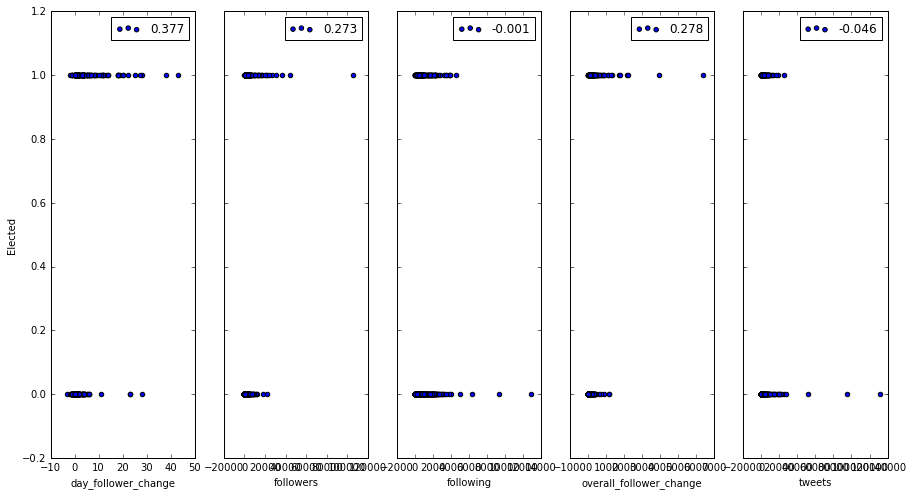

In [10]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
%matplotlib inline

fig, axs = plt.subplots(1, 5, sharey=True)
df.plot(kind='scatter', x='day_follower_change', y='Elected', label="%.3f"
        % df[['day_follower_change', 'Elected']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter', x='followers', y='Elected', label="%.3f" 
        % df[['followers', 'Elected']].corr().as_matrix()[0,1], ax=axs[1], figsize=(15, 8))
df.plot(kind='scatter', x='following', y='Elected', label="%.3f" 
        % df[['following', 'Elected']].corr().as_matrix()[0,1], ax=axs[2], figsize=(15, 8))
df.plot(kind='scatter', x='overall_follower_change', y='Elected', label="%.3f" 
        % df[['overall_follower_change', 'Elected']].corr().as_matrix()[0,1], ax=axs[3], figsize=(15, 8))
df.plot(kind='scatter', x='tweets', y='Elected', label="%.3f" 
        % df[['tweets', 'Elected']].corr().as_matrix()[0,1], ax=axs[4], figsize=(15, 8))

### [5pt] Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose the best 3 continuous features.

The continuous features that seem to best predict the outcome of the election of a candidate are day_follower_change, overall_follower_change and followers.

At a first sight, there seems to be a tendency that candidates who gain the most followers on Twitter and who have the most followers have higher probability of getting elected.

This can be seen in the graphs by the difference between the values graphed for Elected = 1 and Elected = 0. We can for example really notice a longer line of points in the day_follower_change graph.

### [10pt] For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots).

I will plot bar plots.

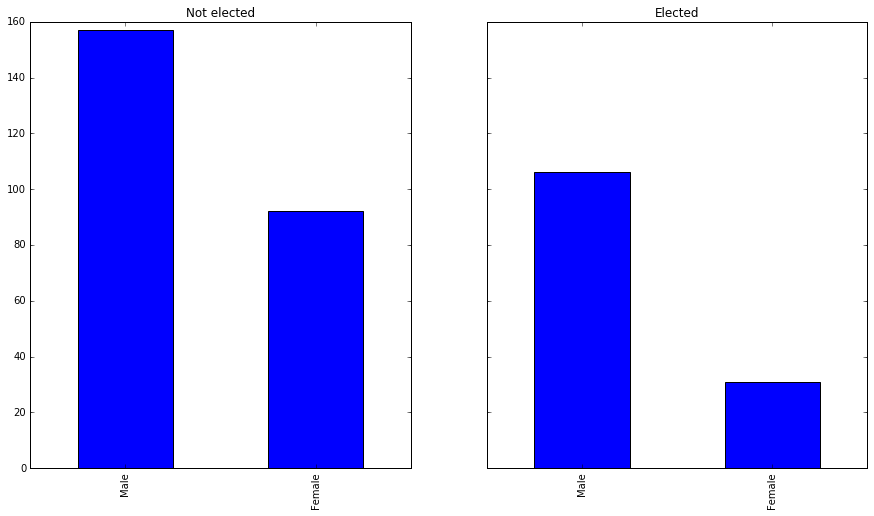

In [11]:
fig, axs = plt.subplots(1, 2, sharey=True)

df.loc[df['Elected'] == 0].Gender.value_counts().plot(kind='bar', ax=axs[0], figsize=(15, 8), title = 'Not elected')
df.loc[df['Elected'] == 1].Gender.value_counts().plot(kind='bar', ax=axs[1], figsize=(15, 8), title = 'Elected')

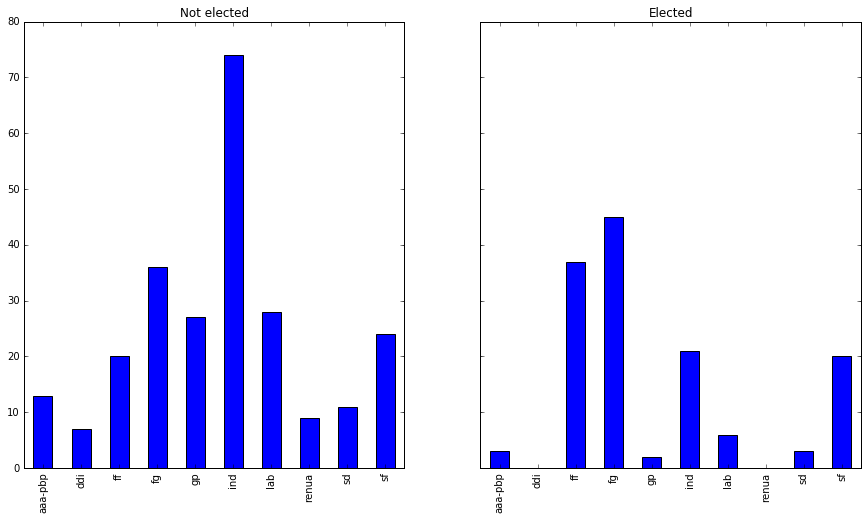

In [12]:
fig, axs = plt.subplots(1, 2, sharey=True)

df.loc[df['Elected'] == 0].Party.value_counts(sort=False).plot(kind='bar', ax=axs[0], figsize=(15, 8), title = 'Not elected')
df.loc[df['Elected'] == 1].Party.value_counts(sort=False).plot(kind='bar', ax=axs[1], figsize=(15, 8), title = 'Elected')

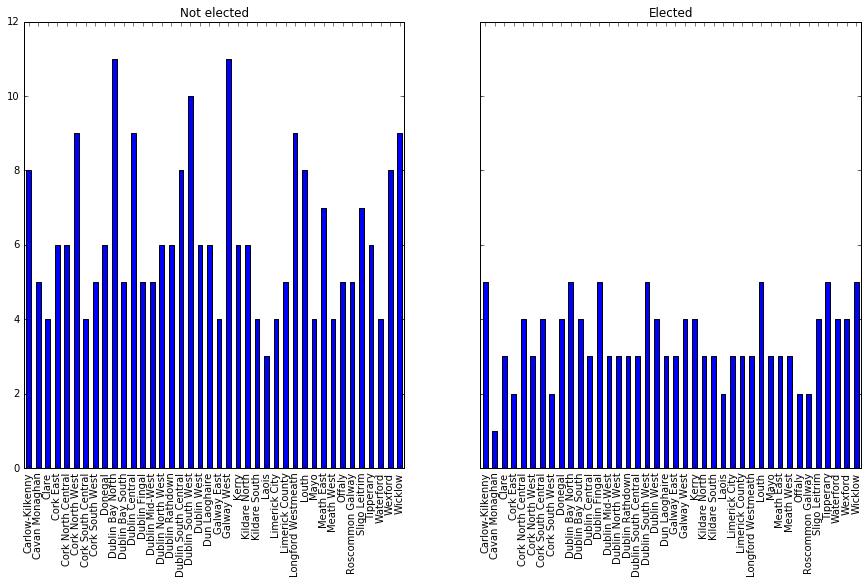

In [13]:
fig, axs = plt.subplots(1, 2, sharey=True)

df.loc[df['Elected'] == 0].Constituency.value_counts(sort=False).plot(kind='bar', ax=axs[0], figsize=(15, 8), title = 'Not elected')
df.loc[df['Elected'] == 1].Constituency.value_counts(sort=False).plot(kind='bar', ax=axs[1], figsize=(15, 8), title = 'Elected')

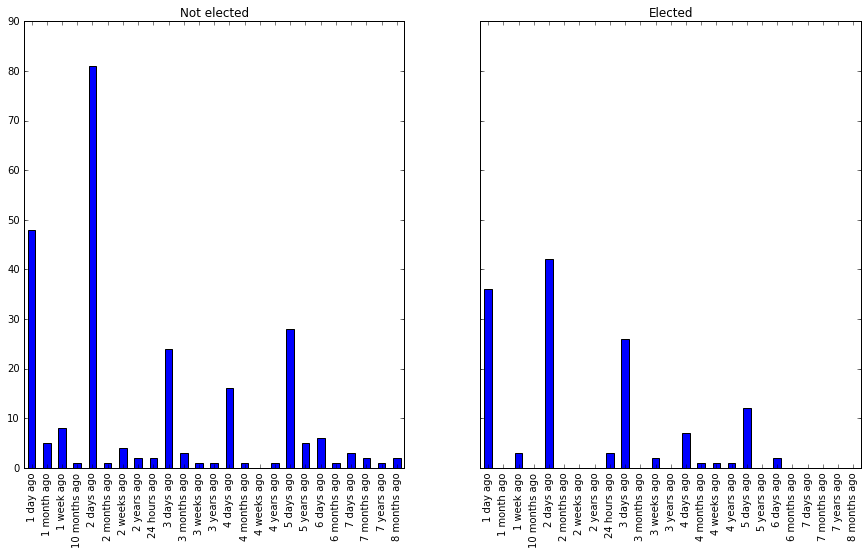

In [14]:
fig, axs = plt.subplots(1, 2, sharey=True)

df.loc[df['Elected'] == 0].last_tweet.value_counts(sort=False).plot(kind='bar', ax=axs[0], figsize=(15, 8), title = 'Not elected')
df.loc[df['Elected'] == 1].last_tweet.value_counts(sort=False).plot(kind='bar', ax=axs[1], figsize=(15, 8), title = 'Elected')

### [5pt] Discuss what knowledge you gain from ploting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose the best 3 categorical features.

The political party of candidates seem to be the strongest indicator of the election of that candidate. We can see a great difference between the political party of candidates elected and the party of candidates not elected. It may mean that parties not elected have a stronger presence on Twitter, or that they present more candidates.

Another interesting feature is last_tweet; elected candidates' tweets seem to be more recent overall.

Last but not least, the gender can also be considered: there seem to be a bigger gap between females and males elected than females and males not elected.

## 3. [20pt] Predictive Modeling: Linear Regression

### [5pt] Train a linear regression model to predict the target feature Elected, using the 6 descriptive features selected in exercise 2.

In [15]:
import statsmodels.formula.api as sm

In [16]:
#training the model using the 6 features selected
lm = sm.ols(formula="Elected ~ day_follower_change + overall_follower_change + followers + C(Party) - 1 + C(Gender) - 1 + C(last_tweet) - 1", 
            data=df).fit()

### [5pt] Print the coeficients learned by the model and discuss their statistical significance.

In [17]:
# Print the cofficients learned for each feature.
print(lm.params)

C(Party)[aaa-pbp]                 0.046433
C(Party)[ddi]                    -0.057597
C(Party)[ff]                      0.509234
C(Party)[fg]                      0.482243
C(Party)[gp]                     -0.080255
C(Party)[ind]                     0.122452
C(Party)[lab]                     0.087736
C(Party)[renua]                  -0.156237
C(Party)[sd]                     -0.044925
C(Party)[sf]                      0.270370
C(Gender)[T.Male]                 0.173294
C(last_tweet)[T.1 month ago]     -0.212652
C(last_tweet)[T.1 week ago]      -0.154278
C(last_tweet)[T.10 months ago]   -0.017101
C(last_tweet)[T.2 days ago]      -0.076185
C(last_tweet)[T.2 months ago]    -0.295593
C(last_tweet)[T.2 weeks ago]     -0.245228
C(last_tweet)[T.2 years ago]     -0.156381
C(last_tweet)[T.24 hours ago]     0.280051
C(last_tweet)[T.3 days ago]      -0.003105
C(last_tweet)[T.3 months ago]    -0.426073
C(last_tweet)[T.3 weeks ago]     -0.311482
C(last_tweet)[T.3 years ago]     -0.443879
C(last_twee

### [5pt] Retrain the model using only the subset of features found to be statistically significant.

In [18]:
#First, we need to select the features found to be statistically significant.
#We can use the summary to help us select them.
#We will select the features whose p-value is below 0.05 and whose 95% confidence intervalle does not include 0.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Elected   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     6.744
Date:                Sun, 24 Apr 2016   Prob (F-statistic):           1.14e-23
Time:                        14:47:40   Log-Likelihood:                -156.96
No. Observations:                 383   AIC:                             389.9
Df Residuals:                     345   BIC:                             539.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
C(Party)[aaa

We learn from that summary that the only features that appear to be statistically significant are:
- Party
- Gender
- last_tweet
- day_follower_change

In [19]:
#re-training our data:
lm = sm.ols(formula="Elected ~ day_follower_change + C(Party) - 1 + C(Gender) - 1 + C(last_tweet) - 1", 
            data=df).fit()

lm.params

C(Party)[aaa-pbp]                 0.058343
C(Party)[ddi]                    -0.056636
C(Party)[ff]                      0.512471
C(Party)[fg]                      0.479589
C(Party)[gp]                     -0.069188
C(Party)[ind]                     0.122693
C(Party)[lab]                     0.084157
C(Party)[renua]                  -0.156149
C(Party)[sd]                     -0.029657
C(Party)[sf]                      0.284641
C(Gender)[T.Male]                 0.175128
C(last_tweet)[T.1 month ago]     -0.215929
C(last_tweet)[T.1 week ago]      -0.156492
C(last_tweet)[T.10 months ago]   -0.018979
C(last_tweet)[T.2 days ago]      -0.076030
C(last_tweet)[T.2 months ago]    -0.297822
C(last_tweet)[T.2 weeks ago]     -0.251583
C(last_tweet)[T.2 years ago]     -0.158400
C(last_tweet)[T.24 hours ago]     0.270335
C(last_tweet)[T.3 days ago]      -0.003728
C(last_tweet)[T.3 months ago]    -0.428071
C(last_tweet)[T.3 weeks ago]     -0.314958
C(last_tweet)[T.3 years ago]     -0.459769
C(last_twee

### [5pt] Using the above trained model, print the predicted target feature for all the examples in the training set. Threshold the predicted target feature at 0.5 to get the predicted class for each example. Print the accuracy of the model on the training set.

lm.predict will not work if the data frame has nan values, even if the values are not on the column we assessed (cf https://github.com/statsmodels/statsmodels/issues/21710).

In order to avoid further problems I decided to check where the nan were and remove them.

I decided to delete them (rather than setting their values to something different) since these rows would not be very interesting to analyse anyway. They have no Twitter data and we are trying to make prediction largely based on Twitter data.

In [20]:
#check where the NaN are:
inds = pd.isnull(df).any(1).nonzero()[0]

In [21]:
#Delete the indexes
df = df.drop(df.index[[inds]])

In [22]:
#reset the indexes
df = df.reset_index(drop=True)

In [23]:
#re-training our data
#the outcome will be the same as previously but it is still required otherwise the prediction will not work due
#to the NaN values on the previous data frame
lm = sm.ols(formula="Elected ~ day_follower_change + C(Party) - 1 + C(Gender) - 1 + C(last_tweet) - 1", 
            data=df).fit()

lm.params

C(Party)[aaa-pbp]                 0.058343
C(Party)[ddi]                    -0.056636
C(Party)[ff]                      0.512471
C(Party)[fg]                      0.479589
C(Party)[gp]                     -0.069188
C(Party)[ind]                     0.122693
C(Party)[lab]                     0.084157
C(Party)[renua]                  -0.156149
C(Party)[sd]                     -0.029657
C(Party)[sf]                      0.284641
C(Gender)[T.Male]                 0.175128
C(last_tweet)[T.1 month ago]     -0.215929
C(last_tweet)[T.1 week ago]      -0.156492
C(last_tweet)[T.10 months ago]   -0.018979
C(last_tweet)[T.2 days ago]      -0.076030
C(last_tweet)[T.2 months ago]    -0.297822
C(last_tweet)[T.2 weeks ago]     -0.251583
C(last_tweet)[T.2 years ago]     -0.158400
C(last_tweet)[T.24 hours ago]     0.270335
C(last_tweet)[T.3 days ago]      -0.003728
C(last_tweet)[T.3 months ago]    -0.428071
C(last_tweet)[T.3 weeks ago]     -0.314958
C(last_tweet)[T.3 years ago]     -0.459769
C(last_twee

In [24]:
#Finally printing the predictiom
prediction = lm.predict()

prediction

array([  7.13123350e-01,   9.25052499e-01,   4.55796723e-01,
         3.86194903e-01,   4.66633565e-02,   2.33471516e-01,
         5.22530082e-01,   2.75197081e-01,  -2.37390461e-02,
         6.88568746e-01,  -1.14763913e-01,   1.17718645e-01,
         5.32175112e-01,   1.02212454e-01,   2.60498004e-01,
         1.18492714e-01,   2.49800181e-16,   2.08610635e-01,
         7.46974728e-01,   6.50989631e-01,   2.97821740e-01,
         6.12538612e-01,   8.14677484e-01,   6.45420594e-01,
         2.17106227e-01,   4.52215237e-02,   2.49800181e-15,
        -5.72793322e-03,   1.45471510e-01,   5.00158886e-02,
         9.89010947e-02,   6.50989631e-01,   3.00120449e-01,
         7.56271502e-01,   4.67078630e-01,   4.93620397e-01,
         6.24084216e-01,  -8.09125353e-02,   1.39791569e-01,
         6.50989631e-01,   7.89955421e-01,   4.11886362e-01,
         2.11393564e-02,   9.89010947e-02,   4.75861381e-01,
         6.88568746e-01,   2.60848373e-01,   3.05311332e-16,
         2.16739080e-02,

In [25]:
#Transform the prediction to get the class
prediction = (prediction > 0.5) * 1.0

prediction

array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1

In [26]:
#Printing the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(df["Elected"], prediction)

0.83289817232375984

### We learn from that that we have construced a prediction model which is 83.28% efficient! :-)

## 4. [20pt] Predictive Modeling: Logistic Regression

### [5pt] Train a logistic regression model to predict the target feature Elected, using the 6 descriptive features selected in exercise 2.

In [27]:
#Train a logistic regression model
logreg = sm.logit(formula="Elected ~ day_follower_change + overall_follower_change + followers + C(Party) - 1 + C(Gender) - 1 + C(last_tweet) - 1"
                  , data=df).fit()

         Current function value: 0.350615
         Iterations: 35


/home/pauline/anaconda3/envs/comp47350/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### [5pt] Print the coeficients learned by the model and discuss their statistical significance.

In [28]:
# Print the model weights/parameters
print(logreg.params)

C(Party)[aaa-pbp]                 -3.562882
C(Party)[ddi]                    -37.690623
C(Party)[ff]                      -0.750080
C(Party)[fg]                      -0.840636
C(Party)[gp]                      -5.841914
C(Party)[ind]                     -3.013363
C(Party)[lab]                     -3.652331
C(Party)[renua]                  -32.950360
C(Party)[sd]                      -6.028693
C(Party)[sf]                      -2.206905
C(Gender)[T.Male]                  1.434899
C(last_tweet)[T.1 month ago]     -18.069614
C(last_tweet)[T.1 week ago]       -0.917453
C(last_tweet)[T.10 months ago]     6.525716
C(last_tweet)[T.2 days ago]       -0.759403
C(last_tweet)[T.2 months ago]    -23.710589
C(last_tweet)[T.2 weeks ago]     -16.826094
C(last_tweet)[T.2 years ago]     -19.593505
C(last_tweet)[T.24 hours ago]      2.318004
C(last_tweet)[T.3 days ago]       -0.262915
C(last_tweet)[T.3 months ago]    -25.632039
C(last_tweet)[T.3 weeks ago]      -0.946445
C(last_tweet)[T.3 years ago]    

In [29]:
#printing the summary to check which features are significant
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                Elected   No. Observations:                  383
Model:                          Logit   Df Residuals:                      345
Method:                           MLE   Df Model:                           37
Date:                Sun, 24 Apr 2016   Pseudo R-squ.:                  0.4610
Time:                        14:47:41   Log-Likelihood:                -134.29
converged:                      False   LL-Null:                       -249.16
                                        LLR p-value:                 1.150e-29
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
C(Party)[aaa-pbp]                 -3.5629      0.986     -3.612      0.000        -5.496    -1.630
C(Party)[ddi]                    -37.6906   3.95e+07  -9.54e-07      1.

We conclude from the above tables that the following features are significant (their p-value is below 0.05 and their 95% confidence interval does not include zero):
- Party
- Gender
- Last Tweet
- day_follower_change 
- overall_follower_change

### [5pt] Retrain the model using only the subset of features found to be statistically significant.

In [31]:
#rename some columns
df = df.rename(columns={'aaa-pbp': 'aaa_pbp'})

logreg = sm.logit(formula="Elected ~ day_follower_change + overall_follower_change + C(Party) - 1 + C(Gender) - 1 + C(last_tweet) - 1"
                  , data=df).fit()

         Current function value: 0.350663
         Iterations: 35


LinAlgError: Singular matrix

In [32]:
#statsmodel fails to learn a model. We will try with sklearn

# import packages

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [33]:
# Prepare an intercept term that adds a 1 to each example.
intercept = pd.DataFrame({'Intercept': np.ones(df.shape[0])})
intercept

,Intercept
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [34]:
X = pd.concat([intercept, 
               df[['day_follower_change', 'overall_follower_change']], 
               pd.get_dummies(df['Gender']), 
               pd.get_dummies(df['Party']), 
               pd.get_dummies(df['last_tweet'])], 
               axis=1)
y = df.Elected
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
      Intercept  day_follower_change  overall_follower_change  Female  Male  \
0            1                    3                       98       0     1   
1            1                    0                        4       0     1   
2            1                    0                       49       0     1   
3            1                    3                      261       1     0   
4            1                    0                       19       1     0   
5            1                    0                       22       0     1   
6            1                    1                       70       0     1   
7            1                    5                      130       0     1   
8            1                    0                        9       1     0   
9            1                    1                       95       0     1   
10           1                    0                       67       1     0   
11           1                    4      

In [35]:
# Train the model using logistic regression from scikit-learn.
logreg = LogisticRegression().fit(X, y)

In [36]:
# Examine the estimated logistic regression coefficients.
print("Coeficients: \n", logreg.coef_)

Coeficients: 
 [[-1.00182805  0.18908625  0.00318366 -1.07999711  0.07816906 -0.22923885
  -0.62190897  1.79354803  1.62859399 -1.45049828 -0.11024067 -0.41968531
  -1.31777233 -0.95539209  0.68076642  0.54516951 -0.37582211 -0.07353563
  -0.04729246  0.03669711 -0.1010014  -0.35935696 -0.13894385  1.24733782
   0.50200707 -0.50210302  0.00181922 -0.18608374 -0.0727689   0.27749569
   0.49094682  0.59304751 -0.51433603 -0.85419932  0.09497705 -0.33365174
  -0.3361851  -0.4344162  -0.33016232 -0.1314671 ]]


### [5pt] Using the above trained model, print the predicted target feature for all the examples in the training set. Print the predicted class for each example. Print the accuracy of the model on the training set.

In [37]:
#print predictions
prediction = logreg.predict(X)

prediction

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [38]:
#accuracy score
accuracy_score(df["Elected"], prediction)

0.83028720626631858

The logistic regression model is marginally lower than the linear one in that example (83.287%).

## 5. [20pt] Evaluating Predictive Models

### [5pt] Split the dataset into 70% training and remaining 30% test. Train linear regression and logistic regression on the training set using the 6 descriptive features selected in Ex2.

In [39]:
#create training set
df_train = df[:int(0.7 * df.shape[0])]

In [40]:
#create test set
df_test = df[int(0.7 * df.shape[0]):]

In [41]:
#look at the shape of the new sets
df_train.shape

(268, 15)

In [42]:
df_test.shape

(115, 15)

In [43]:
#Training linear regression
lm = sm.ols(formula="Elected ~ day_follower_change + overall_follower_change + followers + C(Party) - 1 + C(Gender) - 1 + C(last_tweet) - 1", 
            data=df_train).fit()

lm.params

C(Party)[aaa-pbp]                 2.469586e-02
C(Party)[ddi]                    -5.961880e-02
C(Party)[ff]                      4.782445e-01
C(Party)[fg]                      4.635789e-01
C(Party)[gp]                     -9.007888e-02
C(Party)[ind]                     6.475014e-02
C(Party)[lab]                     3.670931e-02
C(Party)[renua]                  -3.500431e-01
C(Party)[sd]                     -6.443252e-02
C(Party)[sf]                      2.019065e-01
C(Gender)[T.Male]                 1.293295e-01
C(last_tweet)[T.1 month ago]     -2.153569e-01
C(last_tweet)[T.1 week ago]      -3.521529e-01
C(last_tweet)[T.10 months ago]    2.202134e-01
C(last_tweet)[T.2 days ago]      -6.219185e-02
C(last_tweet)[T.2 months ago]    -1.963326e-01
C(last_tweet)[T.2 weeks ago]     -2.214898e-01
C(last_tweet)[T.2 years ago]      2.204411e-01
C(last_tweet)[T.24 hours ago]     5.602698e-01
C(last_tweet)[T.3 days ago]      -9.732940e-03
C(last_tweet)[T.3 months ago]    -6.231938e-01
C(last_tweet)

In [44]:
#Train a logistic regression model
logreg = sm.logit(formula="Elected ~ day_follower_change + overall_follower_change + followers + C(Party) - 1 + C(Gender) - 1 + C(last_tweet) - 1"
                  , data=df_train).fit()


         Current function value: 0.353984
         Iterations: 35


LinAlgError: Singular matrix

In [45]:
#We can't learn a model with Statsmodel, we will therefore use sklearn as we did before

intercept = pd.DataFrame({'Intercept': np.ones(df_train.shape[0])})
intercept

,Intercept
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [46]:
# Prepare the descriptive features
X = pd.concat([intercept, 
               df_train[['day_follower_change', 'overall_follower_change', 'followers']], 
               pd.get_dummies(df_train['Gender']), 
               pd.get_dummies(df_train['Party']), 
               pd.get_dummies(df_train['last_tweet'])], 
               axis=1)
y = df_train.Elected
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
      Intercept  day_follower_change  overall_follower_change  followers  \
0            1                    3                       98        565   
1            1                    0                        4        384   
2            1                    0                       49       1078   
3            1                    3                      261       1149   
4            1                    0                       19        114   
5            1                    0                       22        168   
6            1                    1                       70        725   
7            1                    5                      130       1232   
8            1                    0                        9         84   
9            1                    1                       95       4139   
10           1                    0                       67       1708   
11           1                    4                      169       1172   
12

In [47]:
# Train the model using logistic regression from scikit-learn.
logreg = LogisticRegression().fit(X, y)

In [48]:
# Examine the estimated logistic regression coefficients.
print("Coeficients: \n", logreg.coef_)

Coeficients: 
 [[ -8.69354186e-01   1.75229335e-01   2.97583163e-03  -2.68840206e-05
   -8.55816397e-01  -1.35377886e-02  -1.52248273e-01  -2.94983354e-01
    1.58739555e+00   1.51695821e+00  -1.32943800e+00  -3.36639212e-01
   -5.89312456e-01  -1.05339204e+00  -8.33789945e-01   6.16095330e-01
    2.74367573e-01  -2.58986564e-01  -4.35665674e-01  -7.31803106e-02
   -1.29436089e-01  -7.44896691e-02  -2.81762562e-01  -7.30442437e-02
    7.67232157e-01   3.01275378e-01  -2.81014874e-01  -3.02194255e-01
    0.00000000e+00   2.15179706e-01   2.35192778e-01   3.75398131e-01
    4.20723795e-01  -5.30629555e-01  -3.90722358e-01   1.46471524e-01
   -2.52102998e-01  -1.93451012e-01   0.00000000e+00  -2.54724270e-01
   -7.37907912e-02]]


### [5pt] Predict with both models on the test set. Print classification evaluation metrics for both models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1).

##### linear regression model

In [49]:
predict_train = (lm.predict(df_train) > 0.5) * 1
predict_train

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [50]:
predict_test = (lm.predict(df_test) > 0.5) * 1
predict_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [51]:
# Evaluation of the training set
print("Accuracy: ", metrics.accuracy_score(df_train["Elected"], predict_train))
print("Confusion matrix: \n", metrics.confusion_matrix(df_train["Elected"], predict_train))
print("Classification report:\n ", metrics.classification_report(df_train["Elected"], predict_train))

Accuracy:  0.824626865672
Confusion matrix: 
 [[151  22]
 [ 25  70]]
Classification report:
               precision    recall  f1-score   support

          0       0.86      0.87      0.87       173
          1       0.76      0.74      0.75        95

avg / total       0.82      0.82      0.82       268



In [52]:
# Evaluation of the test set
print("Accuracy: ", metrics.accuracy_score(df_test["Elected"], predict_test))
print("Confusion matrix: \n", metrics.confusion_matrix(df_test["Elected"], predict_test))
print("Classification report:\n ", metrics.classification_report(df_test["Elected"], predict_test))

Accuracy:  0.8
Confusion matrix: 
 [[67  7]
 [16 25]]
Classification report:
               precision    recall  f1-score   support

          0       0.81      0.91      0.85        74
          1       0.78      0.61      0.68        41

avg / total       0.80      0.80      0.79       115



We can see that the scores of the test set are slightly below the scores of the training set (82.462% vs 80%)

##### logistic regression model

In [53]:
logreg_predict_train = logreg.predict(X)
logreg_predict_train

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [54]:
# Prepare the test set
intercept_test = pd.DataFrame({'Intercept': np.ones(df_test.shape[0])})


In [55]:
df_test = df_test.reset_index(drop=True)

X2 = pd.concat([intercept_test, 
               df_test[['day_follower_change', 'overall_follower_change', 'followers']], 
               pd.get_dummies(df_test['Gender']), 
               pd.get_dummies(df_test['Party']), 
               pd.get_dummies(df_test['last_tweet'])], 
               axis=1)

In [56]:
logreg_predict_test = logreg.predict(X2)
logreg_predict_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [57]:
# Evaluation of the training set
print("Accuracy: ", metrics.accuracy_score(df_train["Elected"], logreg_predict_train))
print("Confusion matrix: \n", metrics.confusion_matrix(df_train["Elected"], logreg_predict_train))
print("Classification report:\n ", metrics.classification_report(df_train["Elected"], logreg_predict_train))

Accuracy:  0.828358208955
Confusion matrix: 
 [[157  16]
 [ 30  65]]
Classification report:
               precision    recall  f1-score   support

          0       0.84      0.91      0.87       173
          1       0.80      0.68      0.74        95

avg / total       0.83      0.83      0.82       268



In [58]:
# Evaluation of the test set
print("Accuracy: ", metrics.accuracy_score(df_test["Elected"], logreg_predict_test))
print("Confusion matrix: \n", metrics.confusion_matrix(df_test["Elected"], logreg_predict_test))
print("Classification report:\n ", metrics.classification_report(df_test["Elected"], logreg_predict_test))

Accuracy:  0.773913043478
Confusion matrix: 
 [[69  5]
 [21 20]]
Classification report:
               precision    recall  f1-score   support

          0       0.77      0.93      0.84        74
          1       0.80      0.49      0.61        41

avg / total       0.78      0.77      0.76       115



We can notice a drop of the accuracy metrics between the training set and the test set, of about 5 points (82.836% vs 77.391%). This may mean that we have overtrained our training set.

### [10pt] Rescale the descriptive features (range normalisation or standardisation), retrain both models and compare the classification quality on the test set (3pt). Which model performs best and is it more accurate than a simple model that always predicts not-Elected (i.e., Elected=0) (2pt)? Can you find any tricks to improve the best model so far (e.g., using feature significance, creating new features, or other knowledge)?(5pt)

##### Creating a normalized data set

In [59]:
#we will first normalize the continuous categories

df_cont = df[['day_follower_change', 'overall_follower_change', 'followers']]
df_cont

,day_follower_change,overall_follower_change,followers
0,3,98,565
1,0,4,384
2,0,49,1078
3,3,261,1149
4,0,19,114
5,0,22,168
6,1,70,725
7,5,130,1232
8,0,9,84
9,1,95,4139


In [60]:
# We will first rescale the descriptive features to ranges [-1,1]

df_norm = (df_cont - df_cont.min()) / (df_cont.max() - df_cont.min())
df_norm = df_norm * 2 - 1
intercept_all = pd.DataFrame({'Intercept': np.ones(df_norm.shape[0])})

# Create a new dataframe df_train_norm that has all descriptive features rescaled to [-1,1] 
# and the target feature as in original taking values 0 or 1.

df_norm = pd.concat([intercept_all, 
                           df_norm, 
                           df.Elected,
                           pd.get_dummies(df['Gender']), 
                           pd.get_dummies(df['Party']), 
                           pd.get_dummies(df['last_tweet'])], axis=1)
print(df_norm)

     Intercept  day_follower_change  overall_follower_change  followers  \
0            1            -0.739130                -0.966128  -0.989401   
1            1            -0.869565                -0.995609  -0.992827   
2            1            -0.869565                -0.981496  -0.979692   
3            1            -0.739130                -0.915007  -0.978348   
4            1            -0.869565                -0.990905  -0.997937   
5            1            -0.869565                -0.989964  -0.996915   
6            1            -0.826087                -0.974910  -0.986373   
7            1            -0.652174                -0.956092  -0.976777   
8            1            -0.869565                -0.994041  -0.998505   
9            1            -0.826087                -0.967069  -0.921759   
10           1            -0.869565                -0.975851  -0.967768   
11           1            -0.695652                -0.943861  -0.977913   
12           1           

In [61]:
#building the training and testing set
df_train_norm = df_norm[:int(0.7 * df_norm.shape[0])]
df_test_norm = df_norm[int(0.7 * df_norm.shape[0]):]

df_train_norm_elected = df_train_norm['Elected']
df_test_norm_elected = df_test_norm['Elected']

#droping the column elected from our data frame - otherwise we can't make predictions
df_train_norm = df_train_norm.drop('Elected', 1)
df_test_norm = df_test_norm.drop('Elected', 1)

print(df_norm.shape)
print(df_train_norm.shape)
print(df_test_norm.shape)

(383, 42)
(268, 41)
(115, 41)


##### Training our data

In [62]:
#Training linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(df_train_norm, df_train_norm_elected)

#print weight learnt for each feature
lm.coef_

array([  0.00000000e+00,   6.73422515e-01,   1.00157425e+00,
        -1.55485540e-01,  -4.67549821e+12,  -4.67549821e+12,
        -1.49491424e+11,  -1.49491424e+11,  -1.49491424e+11,
        -1.49491424e+11,  -1.49491424e+11,  -1.49491424e+11,
        -1.49491424e+11,  -1.49491424e+11,  -1.49491424e+11,
        -1.49491424e+11,   1.87109842e+10,   1.87109842e+10,
         1.87109842e+10,   1.87109842e+10,   1.87109842e+10,
         1.87109842e+10,   1.87109842e+10,   1.87109842e+10,
         1.87109842e+10,   1.87109842e+10,   1.87109842e+10,
         1.87109842e+10,  -1.99885261e+10,   1.87109842e+10,
         1.87109842e+10,   1.87109842e+10,   1.87109842e+10,
         1.87109842e+10,   1.87109842e+10,   1.87109842e+10,
         1.87109842e+10,   1.87109842e+10,   1.46536801e-06,
         1.87109842e+10,   1.87109842e+10])

In [63]:
#Train a logistic regression
logreg = LogisticRegression().fit(df_train_norm, df_train_norm_elected)

# Print the weights learned for each feature
print(logreg.coef_)

[[  7.21875814e-01   2.89309612e+00   9.35396230e-01   4.92278467e-01
    2.03829705e-02   7.01492843e-01  -1.09617408e-03  -3.88418014e-01
    1.62796618e+00   1.48534651e+00  -8.53101800e-01  -1.43292692e-01
   -2.91982081e-01  -1.03002616e+00  -4.91231468e-01   8.07711514e-01
    6.03452424e-01  -3.39795434e-01  -5.05175278e-01  -5.34652987e-02
    2.88709462e-01  -1.14317214e-01  -3.72631798e-01  -5.34383036e-02
    8.97919259e-01   6.58866576e-01  -3.67143061e-01  -3.40765714e-01
    0.00000000e+00   4.28468240e-01   3.01328190e-01   5.61243636e-01
    5.68959189e-01  -8.08227717e-02  -5.11031937e-01   2.26950868e-01
   -3.45865188e-01  -2.72836630e-01   0.00000000e+00  -3.42815388e-01
   -1.13918015e-01]]


##### Predicting on the training set

In [64]:
#print prediction from the linear regression model
lm_predictions = (lm.predict(df_train_norm)>0.5) * 1
lm_predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [65]:
# Evaluate accuracy of the linear regression model on the training set
print("Accuracy: ", metrics.accuracy_score(df_train_norm_elected, lm_predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(df_train_norm_elected, lm_predictions))
print("Classification report:\n ", metrics.classification_report(df_train_norm_elected, lm_predictions))

Accuracy:  0.824626865672
Confusion matrix: 
 [[151  22]
 [ 25  70]]
Classification report:
               precision    recall  f1-score   support

          0       0.86      0.87      0.87       173
          1       0.76      0.74      0.75        95

avg / total       0.82      0.82      0.82       268



In [66]:
#print the predictions from the logistic regression
predictions = logreg.predict(df_train_norm)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [67]:
# Evaluate accuracy of the logistic regression model on the training set
print("Accuracy: ", metrics.accuracy_score(df_train_norm_elected, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(df_train_norm_elected, predictions))
print("Classification report:\n ", metrics.classification_report(df_train_norm_elected, predictions))

Accuracy:  0.80223880597
Confusion matrix: 
 [[155  18]
 [ 35  60]]
Classification report:
               precision    recall  f1-score   support

          0       0.82      0.90      0.85       173
          1       0.77      0.63      0.69        95

avg / total       0.80      0.80      0.80       268



##### Predicting on the test set

In [68]:
#apply the linear regression model to the test set
test_lm_predictions = (lm.predict(df_test_norm)>0.5) * 1
test_lm_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [69]:
#Evaluate accuracy of the linear regression model on the test set
print("Accuracy: ", metrics.accuracy_score(df_test_norm_elected, test_lm_predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(df_test_norm_elected, test_lm_predictions))
print("Classification report:\n ", metrics.classification_report(df_test_norm_elected, test_lm_predictions))

Accuracy:  0.808695652174
Confusion matrix: 
 [[68  6]
 [16 25]]
Classification report:
               precision    recall  f1-score   support

          0       0.81      0.92      0.86        74
          1       0.81      0.61      0.69        41

avg / total       0.81      0.81      0.80       115



In [70]:
#predict using the logistic regression model on the test set
test_logreg_predictions = logreg.predict(df_test_norm)
test_logreg_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [71]:
#Evaluate accuracy of the logistic regression model on the test set
print("Accuracy: ", metrics.accuracy_score(df_test_norm_elected, test_logreg_predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(df_test_norm_elected, test_logreg_predictions))
print("Classification report:\n ", metrics.classification_report(df_test_norm_elected, test_logreg_predictions))

Accuracy:  0.8
Confusion matrix: 
 [[70  4]
 [19 22]]
Classification report:
               precision    recall  f1-score   support

          0       0.79      0.95      0.86        74
          1       0.85      0.54      0.66        41

avg / total       0.81      0.80      0.79       115



### Testing prediction with random values

In order to check if our models are efficient, we will compare them to random prediction models. In order to make that comparison, I decided to assign each candidate to a random 'Elected' value. We can see from the percentage below that about 36% of the candidates are elected, and 64% are rejected. I therefore built a random prediction which assigns the value 'elected' to 1 in 36% of the case (0 otherwise).

In [72]:
percentage_elected = df['Elected'].value_counts()[1]/df.shape[0]
percentage_not_elected = df['Elected'].value_counts()[0]/df.shape[0]

print(percentage_not_elected * 100, "% of candidates are not elected")
print(percentage_elected * 100, "% of candidates are elected")

64.4908616188 % of candidates are not elected
35.5091383812 % of candidates are elected


In [73]:
from random import randint
random_pred = [None] * df.shape[0]

#randomize prediction as per the election %
for i in range(len(random_pred)):
    random_pred[i] = (randint(0,100) > percentage_not_elected * 100) * 1

print(random_pred)

[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [74]:
#Evaluate accuracy of random prediction
print("Accuracy: ", metrics.accuracy_score(df['Elected'], random_pred))
print("Confusion matrix: \n", metrics.confusion_matrix(df['Elected'], random_pred))
print("Classification report:\n ", metrics.classification_report(df['Elected'], random_pred))

Accuracy:  0.545691906005
Confusion matrix: 
 [[158  89]
 [ 85  51]]
Classification report:
               precision    recall  f1-score   support

          0       0.65      0.64      0.64       247
          1       0.36      0.38      0.37       136

avg / total       0.55      0.55      0.55       383



#### We can see that there is some benefits to our prediction modes. At their worst, they were 80% accurate at predicting whether a particular candidate would be elected or not. The random model, were we just assign a random value as to whether a candidate will be elected, is only 50% accurate. We therefore gain some accuracy when we look at particular details of a candidate (political party, tweets, constutuency, gender...)

A model which always predicts not elected would be about 67% right. Our prediction models have an accuracy of 80-83% which is an improvement of 13 to 16 points.

I found that when we use the subset of features found to be statistically significant, the results are better (about 3 points increase in accuracy). However, in this homework, we did not have a test and a training set when we were requested to calculate that, and therefore the results might be lower eventually.

I tried (below) to get a better model by selected only a subset of features and by binarizing the Party feature as follow: 1 for party "ff", "fg" or "sf", 0 otherwise.

The accuracy results are better with the binarization (77%) but they are still not better than the accuracy results we had previously.

We definitely saw an improvement when we selected the features found to be statistically significant (cf question 1 and 3).


In [76]:
lm = sm.ols(formula="Elected ~ + C(Party) + C(Gender) + day_follower_change"
                  , data=df_train).fit()

In [77]:
lm.params

Intercept              0.066592
C(Party)[T.ddi]       -0.196104
C(Party)[T.ff]         0.338347
C(Party)[T.fg]         0.325405
C(Party)[T.gp]        -0.157741
C(Party)[T.ind]       -0.050153
C(Party)[T.lab]       -0.072382
C(Party)[T.renua]     -0.336778
C(Party)[T.sd]        -0.167435
C(Party)[T.sf]         0.182771
C(Gender)[T.Male]      0.141681
day_follower_change    0.036508
dtype: float64

In [78]:
pred = (lm.predict(df_train) > 0.5) * 1

In [79]:
pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [80]:
accuracy_score(pred, df_train['Elected'])

0.78731343283582089

In [81]:
df['Party_bin'] = 0

df

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets,Party_bin
0,3.07201e+09,Aylward,Bobby,Bobby Aylward,Male,ff,Carlow-Kilkenny,1,3,565,248,2 days ago,98,bobby_aylward,189,0
1,2.35966e+08,Deering,Pat,Pat Deering,Male,fg,Carlow-Kilkenny,1,0,384,22,24 hours ago,4,patdeeringfg,1,0
2,2.24958e+07,FitzGerald,David,David FitzGerald,Male,fg,Carlow-Kilkenny,0,0,1078,1199,5 days ago,49,davidfitzg,492,0
3,3.00404e+09,Funchion,Kathleen,Kathleen Funchion,Female,sf,Carlow-Kilkenny,1,3,1149,263,1 day ago,261,kathleensf1,383,0
4,1.96532e+09,Hourihane,Elizabeth,Elizabeth Hourihane,Female,ind,Carlow-Kilkenny,0,0,114,74,2 days ago,19,elizabethhourih,154,0
5,2.52668e+07,Mac Liam,Conor,Conor Mac Liam,Male,aaa-pbp,Carlow-Kilkenny,0,0,168,78,1 day ago,22,cmacliam,79,0
6,2.48901e+08,McGuinness,John,John McGuinness,Male,ff,Carlow-Kilkenny,1,1,725,238,5 days ago,70,jmcguinnesstd,518,0
7,2.84202e+09,Noonan,Malcolm,Malcolm Noonan,Male,gp,Carlow-Kilkenny,0,5,1232,1878,1 day ago,130,malcolmnoonan1,1372,0
8,2.36442e+08,O'Connor,Jennifer,Jennifer O'Connor,Female,ff,Carlow-Kilkenny,0,0,84,2,5 years ago,9,jennymoconnor,6,0
9,1.99641e+07,Paul Phelan,John,John Paul Phelan,Male,fg,Carlow-Kilkenny,1,1,4139,1760,1 day ago,95,jpphelan,3511,0


In [82]:
for i,party in enumerate(df['Party']):
    if party == "ff" or party == "fg" or party == "sf":
        df.set_value(i,'Party_bin',1)

In [83]:
df

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,day_follower_change,followers,following,last_tweet,overall_follower_change,screen_name,tweets,Party_bin
0,3.07201e+09,Aylward,Bobby,Bobby Aylward,Male,ff,Carlow-Kilkenny,1,3,565,248,2 days ago,98,bobby_aylward,189,1
1,2.35966e+08,Deering,Pat,Pat Deering,Male,fg,Carlow-Kilkenny,1,0,384,22,24 hours ago,4,patdeeringfg,1,1
2,2.24958e+07,FitzGerald,David,David FitzGerald,Male,fg,Carlow-Kilkenny,0,0,1078,1199,5 days ago,49,davidfitzg,492,1
3,3.00404e+09,Funchion,Kathleen,Kathleen Funchion,Female,sf,Carlow-Kilkenny,1,3,1149,263,1 day ago,261,kathleensf1,383,1
4,1.96532e+09,Hourihane,Elizabeth,Elizabeth Hourihane,Female,ind,Carlow-Kilkenny,0,0,114,74,2 days ago,19,elizabethhourih,154,0
5,2.52668e+07,Mac Liam,Conor,Conor Mac Liam,Male,aaa-pbp,Carlow-Kilkenny,0,0,168,78,1 day ago,22,cmacliam,79,0
6,2.48901e+08,McGuinness,John,John McGuinness,Male,ff,Carlow-Kilkenny,1,1,725,238,5 days ago,70,jmcguinnesstd,518,1
7,2.84202e+09,Noonan,Malcolm,Malcolm Noonan,Male,gp,Carlow-Kilkenny,0,5,1232,1878,1 day ago,130,malcolmnoonan1,1372,0
8,2.36442e+08,O'Connor,Jennifer,Jennifer O'Connor,Female,ff,Carlow-Kilkenny,0,0,84,2,5 years ago,9,jennymoconnor,6,1
9,1.99641e+07,Paul Phelan,John,John Paul Phelan,Male,fg,Carlow-Kilkenny,1,1,4139,1760,1 day ago,95,jpphelan,3511,1


In [84]:
lm = sm.ols(formula="Elected ~ + Party_bin + C(Gender) + day_follower_change"
                  , data=df).fit()

In [85]:
lm.params

Intercept             -0.015324
C(Gender)[T.Male]      0.158314
Party_bin              0.379431
day_follower_change    0.034148
dtype: float64

In [86]:
pred = (lm.predict(df) > 0.5) * 1
pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [87]:
accuracy_score(pred, df['Elected'])

0.77284595300261094

In [88]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Elected   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     61.70
Date:                Sun, 24 Apr 2016   Prob (F-statistic):           1.67e-32
Time:                        14:49:35   Log-Likelihood:                -185.02
No. Observations:                 383   AIC:                             378.0
Df Residuals:                     379   BIC:                             393.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -0.0153    